<a href="https://colab.research.google.com/github/lauramoraes/Analise_de_Clusters/blob/master/1%20-%20Modelagem/3%20-%20Entendendo%20a%20matriz%20de%20covari%C3%A2ncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entendendo a matriz de covariância

### Importando bibliotecas a serem usadas

In [4]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Começando com um exemplo

Antes de começarmos, vamos relembrar a diferença entre variância e covariância: a variância é uma medida de **dispersão de somente uma variável aleatória** (como a altura de uma pessoa em uma população), enquanto a covariância é a medida do quanto **duas variáveis aletórias se influenciam linearmente** (como a altura e peso das pessoas em uma população).

Neste exemplo da população, para medir a influência entre altura e peso, usuaríamos a seguinte fórmula para covariância:
 
 **Covariância** $\sigma_{altura,peso} = \frac{1}{n-1}\sum_{i=1}^{n}(idade_i - mediaIdade)(altura_i - mediaAltura)$
 
 Ou seja, para cada indivíduo da população, calculamos como sua idade e sua altura diferenciam da média. A covariância dessas duas variáveis é o valor esperado considerando todos os indivíduos.
 
 
#### Matriz de covariância
Fazendo isso para cada combinação de 2 atributos, é possível construir a matriz de covariância. Ela é uma matriz quadrada, onde cada linha e cada coluna representam os atributos medidos. Veja a seguinte tabela:

|Altura|Peso|
|------|-----|
| 1.85 | 109 |
| 1.72 | 73  |
| 1.47 | 46  |
| 1.65 | 64  |
| 1.60 | 59  |

Se multiplicarmos ela pela transposta obtemos, em forma matricial, o cálculo da covariância. Transformando a equação acima para uma equação matricial, temos que a matriz de covariância C fica:
$ C = \frac{1}{n-1}\sum_{i=1}^{n}(X_i-\overline{X})(X_i-\overline{X})^T$

Normalizando os valores dos atributos para terem média zero, podemos simplificar ainda mais a conta:
$ C = \frac{XX^T}{n-1}$

Então, vamos aos dados!

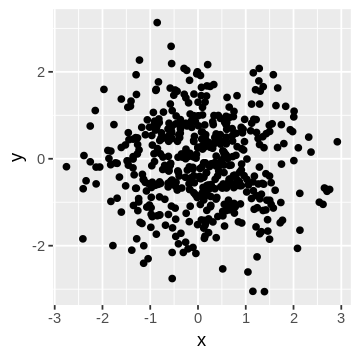

In [21]:
options(repr.plot.width=3, repr.plot.height=3)
# Primeiro, vamos gerar pontos aleatórios com média zero e variância 1 em cada direção (sem correlação entre elas)
# Constantes
N = 500
noise = 0.25

# Gerando dados sintéticos
x = rnorm(N)
y = rnorm(N)

# Criando o dataframe e convertendo para matriz
df  <- data.frame(x = x, y = y)
M = data.matrix(df)

# Plotando os dados
ggplot(data = df, aes(x,y)) + 
  geom_point()

Nesse caso, as coordenadas x e y são totalmente independentes (descorrelacionadas) e a matriz de covariância é dada por:

$ C = \begin{bmatrix}
\sigma(x,x) & 0\\ 
0 & \sigma(y,y)
\end{bmatrix}$

Vamos conferir?

In [22]:
cov(M)

,x,y
x,1.03131355,-0.04544015
y,-0.04544015,1.03399892


E se a coordenada y fosse totalmente dependente de x? O que obteríamos como matriz de covariância?

,x,y
x,1.039357,2.078715
y,2.078715,4.157429


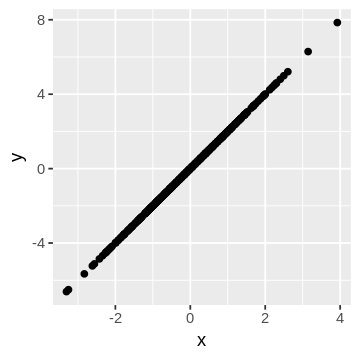

In [24]:
options(repr.plot.width=3, repr.plot.height=3)
# Primeiro, vamos gerar pontos aleatórios com média zero e variância 1 em cada direção (sem correlação entre elas)
# Constantes
N = 500
noise = 0.25

# Gerando dados sintéticos
x = rnorm(N)
# Coordenada y depende de x
y = 2*x

# Criando o dataframe e convertendo para matriz
df  <- data.frame(x = x, y = y)
M = data.matrix(df)

# Plotando os dados
ggplot(data = df, aes(x,y)) + 
  geom_point()

# Calculando a matriz de covariância
cov(M)